In [1]:
import numpy as np
import matplotlib.pyplot as plt
from util import *
from numpy.linalg import norm

# Note: for this simple robot, linear interpolation between (i-1) and (i+1)
#       is a good alternative for the mass center interpolation.

# Get initial path from ik solution

In [2]:
# define path to follow
Np = 8
xp = np.vstack((np.linspace(-1.5, 1.5, Np),
                np.ones(Np) * 1.0
              )).T

In [3]:
qp = np.array([[ 2.10575748,  0.895666  ],
 [ 1.64228905,  1.49674909],
 [ 1.20786201,  1.8685436 ],
 [ 0.74784918,  2.06808096],
 [ 0.32566251,  2.06808096],
 [ 0.06518705,  1.8685436 ],
 [ 0.00255452,  1.49674909],
 [ 0.14017021,  0.89566479]])


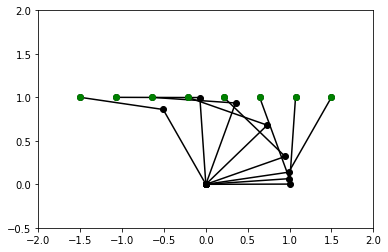

In [4]:
plt.figure()
plt.axis([-2, 2, -0.5, 2])
for j in range(len(qp)):
    x2, x1 = fk(qp[j], all_links = True)
    plt.plot([0, x1[0], x2[0]], [0, x1[1], x2[1]], 'ko-')
plt.plot(xp[:, 0], xp[:, 1], 'go')
plt.show()

# Trajectory shortening

In [42]:
def angle(a, b, na, nb):
    """ At this point it is checked that the norm is not close to zeros"""
    cos_angle = np.dot(a, b) / (na * nb)
    sin_angle = np.cross(a, b) / (na * nb)
    
    return np.arctan2(sin_angle, cos_angle)

def mass_center(q1, q2, q3, w):
    return (q1 + w * q2 + q3) / (2.0 + w)

def dist(p1, p2, a):
    d = norm(p1 - p2)
    if d <= 1e-6:
        raise ValueError("Line must be given by two different points")
    A = abs( (p2[1] - p1[1]) * a[0] - (p2[0] - p1[0]) * a[1] + p2[0] * p1[1] - p2[1] * p1[0] )
    return A / d

def find_new_point(q, i, w_init = 1.0):
    succes = False
    wv = np.linspace(w_init, 4.0, 10)
    for w in wv:
        qmc = mass_center(q[i-1], q[i], q[i+1], w)
        
        # check if this solution is acceptable
        xmc = fk(qmc)
        d = dist(xp[i], xp[i+1], xmc)
        if d < delta:
            succes = True
            return succes, qmc, xmc
    return succes, 0, 0
        
    

In [47]:
delta = 0.9
zeta = 0.001
angle_max = 0.9

qsol = [qp[0]]
xsol = [xp[0]]

print "Note: check if is angle_max or angle_min"


for i in range(1, Np-1):
    print i
    q_new = qp[i]
    x_new = xp[i]
    v1 = qp[i-1] - qp[i]
    v2 = qp[i]   - qp[i+1]
    nv1 = norm(v1)
    nv2 = norm(v2)
    if (nv1 > zeta) and (nv2 > zeta):
        angle12 = angle(v1, v2, nv1, nv2)
        if angle12 < angle_max:
            print "angle " + str(angle12)
            suc, qmc, xmc = find_new_point(qp, i, 0.1)
            
            if suc:
                print "Point changed"
                q_new = qmc
                x_new = xmc
                
    qsol.append(q_new)
    xsol.append(x_new)
    
qsol.append(qp[-1])
xsol.append(xp[-1])

Note: check if is angle_max or angle_min
1
angle 0.20608792631
Point changed
2
angle 0.298596381784
Point changed
3
angle 0.409271002987
Point changed
4
angle 0.653694549143
Point changed
5
angle 0.750208674208
Point changed
6
angle 0.391959969667
Point changed


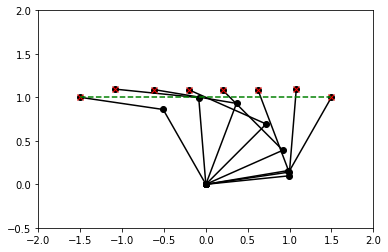

In [48]:
plt.figure()
plt.axis([-2, 2, -0.5, 2])
for j in range(len(qsol)):
    x2, x1 = fk(qsol[j], all_links = True)
    plt.plot([0, x1[0], x2[0]], [0, x1[1], x2[1]], 'ko-')
    plt.plot(xsol[j][0], xsol[j][1], 'rx')
plt.plot(xp[:, 0], xp[:, 1], 'g--')
plt.show()

In [49]:
print qp - np.array(qsol)

[[ 0.          0.        ]
 [-0.01382923  0.10918504]
 [ 0.01218371  0.08202721]
 [-0.01801246  0.09501779]
 [-0.07700534  0.09501779]
 [-0.09421092  0.08202721]
 [-0.0953563   0.10918561]
 [ 0.          0.        ]]


In [50]:
0 != 1



True